In [1]:
from pathlib import Path
from typing import Tuple

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
def load_raw_data() -> pd.DataFrame:
    """
    Load the heart.csv dataset from the data/ folder.
    """
    data_path = Path("../data/heart.csv")
    df = pd.read_csv(data_path)
    return df

In [3]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    if df.isnull().sum().sum() > 0:
        num_cols = df.select_dtypes(include="number").columns
        imputer = SimpleImputer(strategy="median")
        df[num_cols] = imputer.fit_transform(df[num_cols])
    return df

In [4]:
def perform_eda(df: pd.DataFrame) -> None:
    """
    Perform basic EDA: summaries, missing values, distributions, correlations.
    """
    print("=== First 5 Rows ===")
    print(df.head(), "\n")

    print("=== Dataset Info ===")
    print(df.info(), "\n")

    print("=== Summary Statistics ===")
    print(df.describe(), "\n")

    print("=== Missing Values ===")
    print(df.isnull().sum(), "\n")

    print("=== Target Distribution ===")
    print(df["target"].value_counts(), "\n")

    # Plot feature distributions
    features = ["age", "trestbps", "chol", "thalach"]
    for col in features:
        plt.figure()
        plt.hist(df[col], bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    # Correlation heatmap
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    plt.imshow(corr, cmap="coolwarm")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Feature Correlation Matrix")
    plt.show()

In [5]:
# =========================
# 3. DATA CLEANING + FEATURE ENGINEERING
# =========================

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean data and create new features.
    """
    # Handle missing values using median (robust to outliers)
    if df.isnull().sum().sum() > 0:
        numeric_cols = df.select_dtypes(include="number").columns
        imputer = SimpleImputer(strategy="median")
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

    # Feature Engineering:
    # Difference between max heart rate and resting blood pressure
    df["pulse_pressure"] = df["thalach"] - df["trestbps"]

    return df

In [6]:
# =========================
# 4. TRAIN-TEST SPLIT
# =========================

def split_data(
    df: pd.DataFrame,
    test_size: float = 0.2,
    random_state: int = 42
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Split data into training and testing sets.
    """
    X = df.drop("target", axis=1)
    y = df["target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    return X_train, X_test, y_train, y_test

In [9]:
def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    # Example: age group
    df["age_group"] = pd.cut(df["age"], bins=[29, 39, 49, 59, 69, 79], labels=[1,2,3,4,5])

In [10]:
# =========================
# 5. MAIN PIPELINE
# =========================

def main() -> None:
    """
    Main function to run the full analysis pipeline.
    """
    # Load data
    df = load_raw_data()

    # Perform EDA
    perform_eda(df)

    # Clean data and engineer features
    df = preprocess_data(df)

    # Train-test split
    X_train, X_test, y_train, y_test = split_data(df)

    print("=== Train/Test Split Shapes ===")
    print("X_train:", X_train.shape)
    print("X_test:", X_test.shape)
    print("y_train:", y_train.shape)
    print("y_test:", y_test.shape)

=== First 5 Rows ===
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0   

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int6

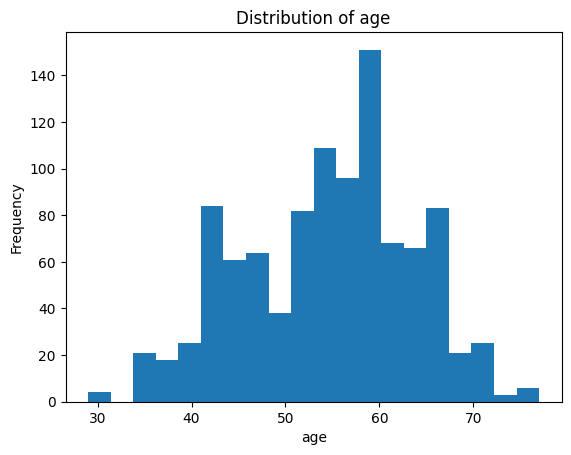

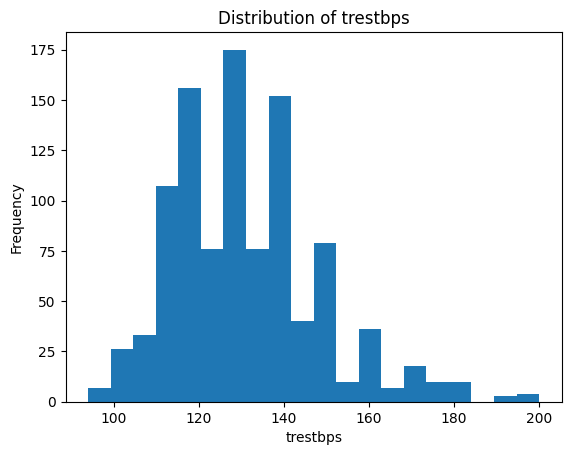

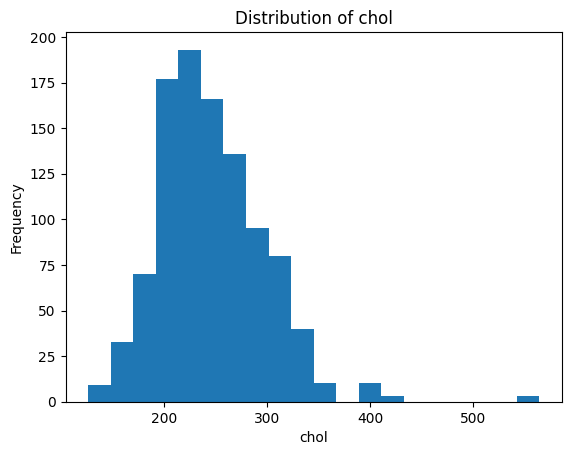

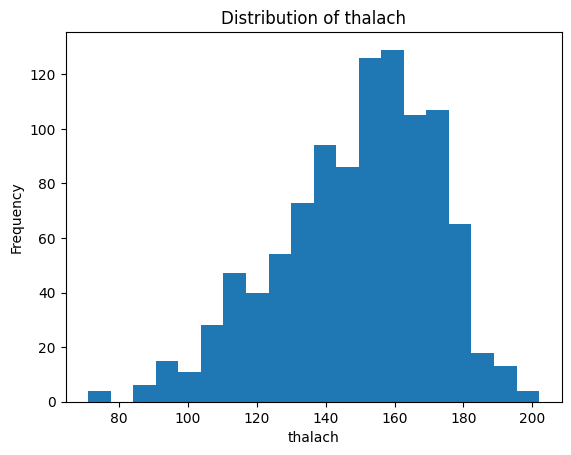

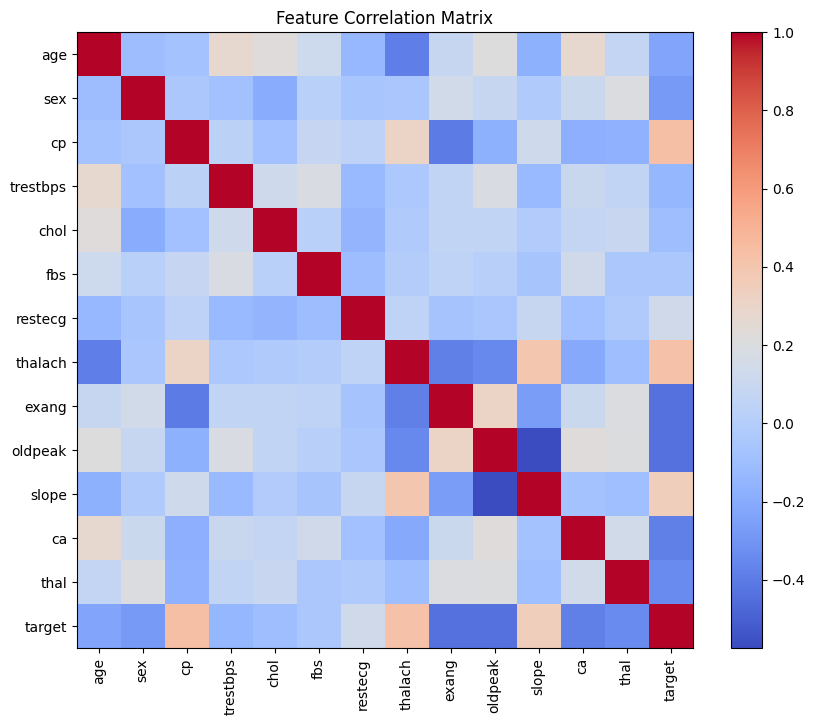

=== Train/Test Split Shapes ===
X_train: (820, 14)
X_test: (205, 14)
y_train: (820,)
y_test: (205,)


In [8]:
if __name__ == "__main__":
    main()